# K-Means Clustering

### Random 하게 생성된 toy dataset 으로 K-Means clustering test

make_blobs : 
```
    Input :
         n_samples :  cluster 에 균등 분할될 total data point 숫자  
         centers : generate 할 centroid 숫자  
         cluster_std : cluster 의 standard deviation    

    Output : 
        X: 생성된 sample 들  
        y: 각 sample 의 label
```
KMeans :  
> init : initialization method -> k-means++ (smart choosing of centroids)  
> n_clusters : k 값  
> n_init : 반복횟수  

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
np.random.seed(101)

In [3]:
centroidLocation = [[3,2], [1,-1],[-1,2]]

X, _ = make_blobs(n_samples=1500, centers=centroidLocation)

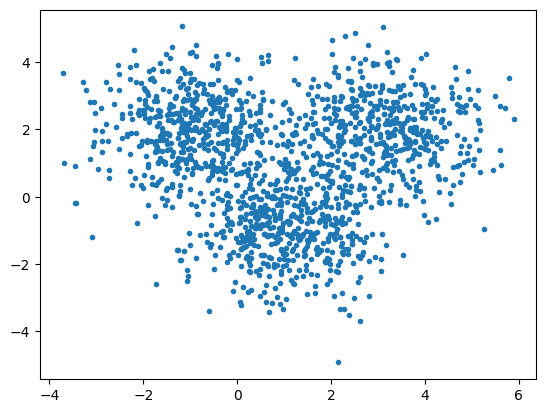

In [4]:
plt.scatter(X[:,0], X[:,1], marker='.')

In [5]:
print(X.shape)
print(X[:10])

(1500, 2)
[[-1.21729731  0.34549836]
 [-1.21658421 -1.87049396]
 [ 4.14277516  2.67891613]
 [ 1.2492407   0.54037484]
 [ 4.09955027  0.97450081]
 [ 0.92034431 -0.64397538]
 [ 0.61013832 -0.57942099]
 [ 1.98458314 -2.18392424]
 [-0.24473773  2.72739937]
 [-1.29350714  0.90821259]]


In [6]:
nclusters = 3

In [7]:
k_means = KMeans(n_clusters=nclusters)

In [8]:
k_means.fit(X)

C:\Users\trimu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [9]:
k_means.labels_

array([2, 0, 1, ..., 0, 2, 2])

In [10]:
centers = k_means.cluster_centers_
centers

array([[ 1.05328721, -0.96170352],
       [ 3.14738308,  2.02818883],
       [-0.97958037,  2.04290344]])

In [11]:
from matplotlib.colors import ListedColormap

# 뚜렷한 색상의 사용자 정의 컬러맵 생성
# 여기서는 빨간색, 초록색, 파란색을 각각의 클래스에 대한 데이터 포인트 색상으로 사용
colors_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# 연한 색상의 사용자 정의 컬러맵 생성
# 여기서는 연한 빨간색, 연한 초록색, 연한 파란색을 각각의 클래스에 대한 배경 색상으로 사용
colors_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

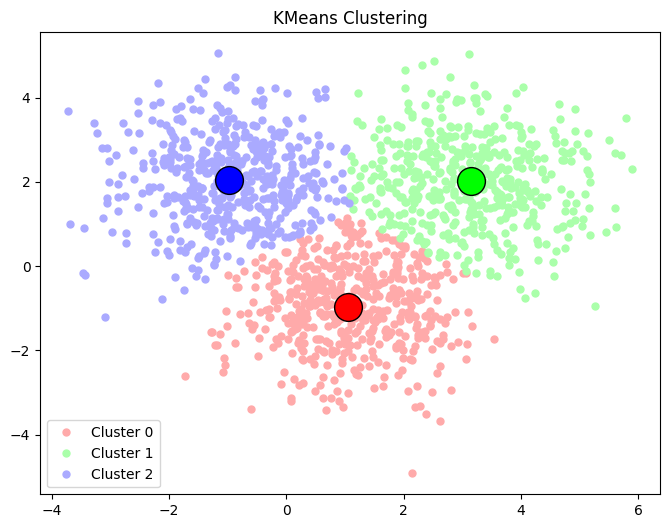

In [12]:
plt.figure(figsize=(8,6))

# 클러스터의 수만큼 반복하여 각 클러스터의 데이터 포인트와 중심을 플로팅
for i in range(nclusters):
    # i번째 클러스터에 속하는 데이터 포인트를 선택
    members = k_means.labels_ == i
    # 선택된 데이터 포인트를 플로팅
    plt.plot(X[members, 0], X[members, 1], '.', 
             color=colors_light(i), markersize=10, label='Cluster {}'.format(i))
    # i번째 클러스터의 중심을 플로팅
    plt.plot(centers[i, 0], centers[i, 1], 'o', 
             color=colors_bold(i), markeredgecolor='k', markersize=20)

# 그래프의 제목을 설정
plt.title("KMeans Clustering")
# 범례를 표시
plt.legend()

# 그래프를 표시
plt.show()